<a href="https://colab.research.google.com/github/nabilasalsabilaa/Credit-Score-Prediction/blob/main/CreditScorePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the libraries

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import matplotlib as mpl
import matplotlib.pylab as pylab
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import random
import time
import warnings
warnings.filterwarnings('ignore')
print('-'*25)
from subprocess import check_output

-------------------------


Loading Data

In [5]:
df = pd.read_csv('./data/home-credit-default-risk-application_train.csv')

Data Analysis

In [6]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.shape

(307511, 122)

In [8]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


Cleaning Data

In [9]:
# Checking missing data
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


In [10]:
# Duplicate check
df.drop_duplicates()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df.dropna(axis=0, how='any')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,Cash loans,F,Y,Y,2,112500.0,361462.5,16051.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,Cash loans,F,Y,Y,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,456140,1,Cash loans,F,Y,Y,1,261000.0,711454.5,47673.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,Cash loans,F,Y,Y,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


Data Visualization

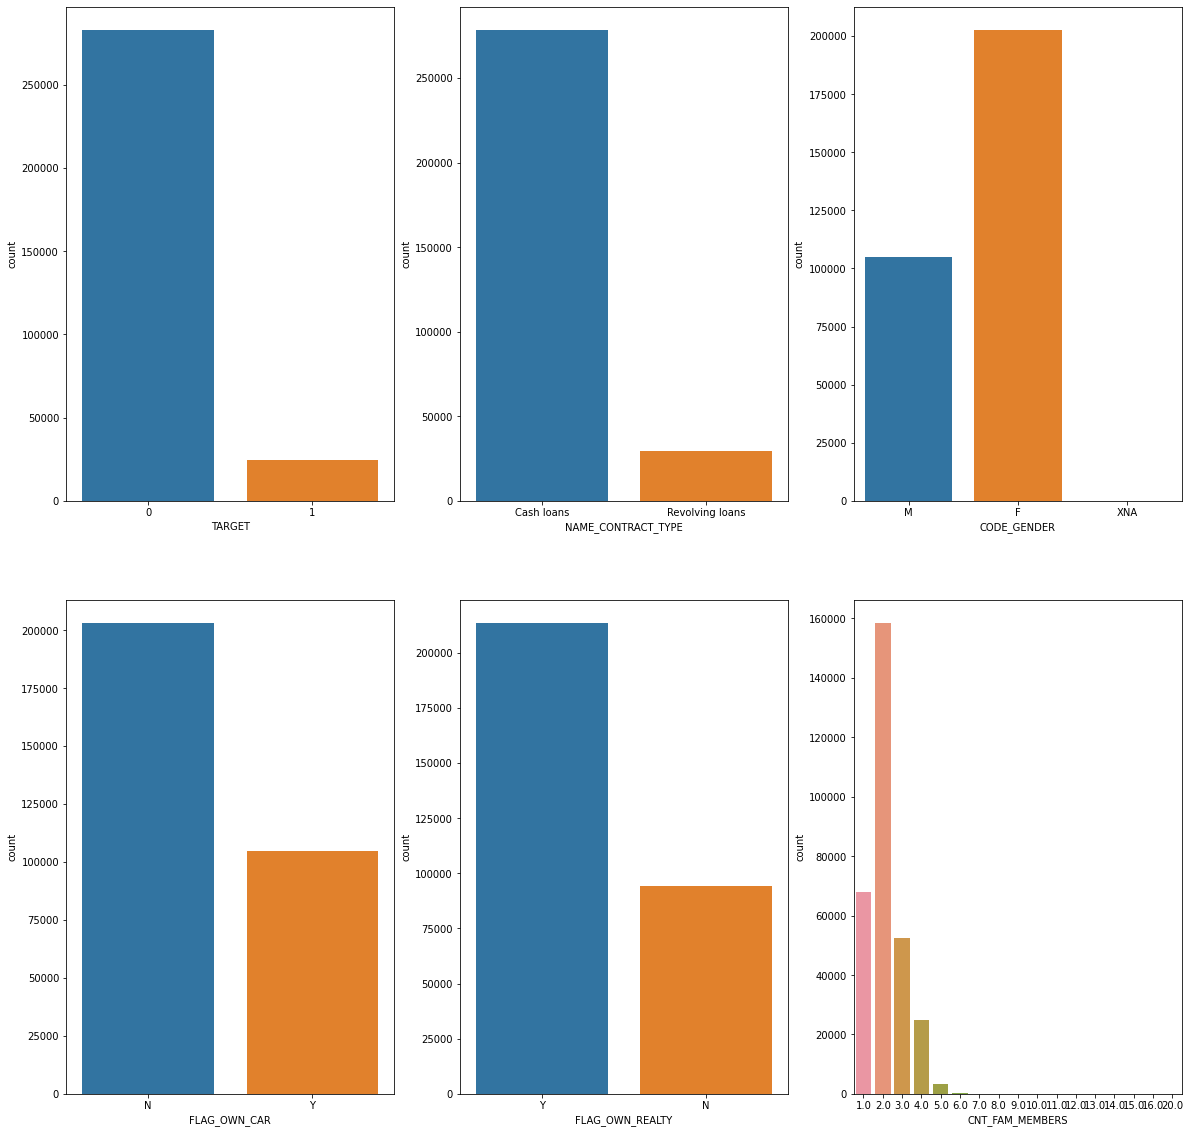

In [12]:
fig, saxis = plt.subplots(2, 3,figsize=(20,20))

sns.countplot(x ='TARGET',data=df, ax = saxis [0,0])
sns.countplot(x='NAME_CONTRACT_TYPE',data=df, ax = saxis [0,1])
sns.countplot(x='CODE_GENDER',data=df, ax = saxis [0,2])
              
sns.countplot(x ='FLAG_OWN_CAR',data=df, ax = saxis [1,0])
sns.countplot(x='FLAG_OWN_REALTY',data=df, ax = saxis [1,1])
sns.countplot(x='CNT_FAM_MEMBERS',data=df, ax = saxis [1,2])

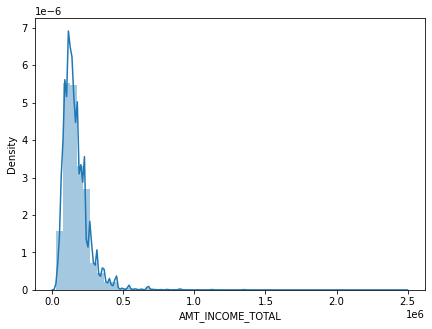

In [13]:
plt.figure(figsize=(7,5))
sns.distplot(df.loc[df['AMT_INCOME_TOTAL'] < 0.25e7, 'AMT_INCOME_TOTAL'].dropna())
plt.show()

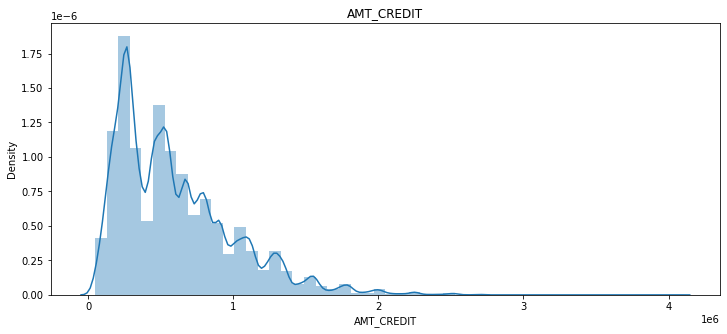

In [14]:
plt.figure(figsize=(12,5))
plt.title("AMT_CREDIT")
ax = sns.distplot(df["AMT_CREDIT"])

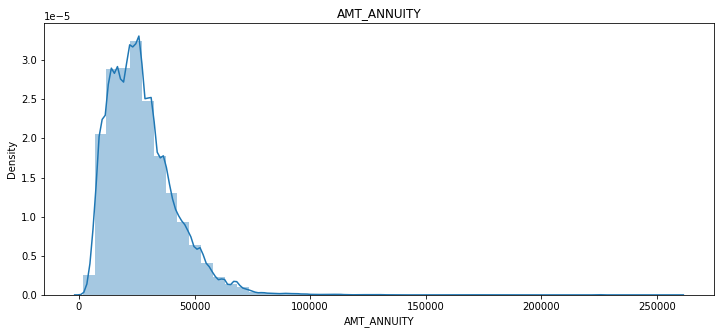

In [15]:
plt.figure(figsize=(12,5))
plt.title("AMT_ANNUITY")
ax = sns.distplot(df["AMT_ANNUITY"])

Text(0.5, 1.0, 'NAME_INCOME_TYPE')

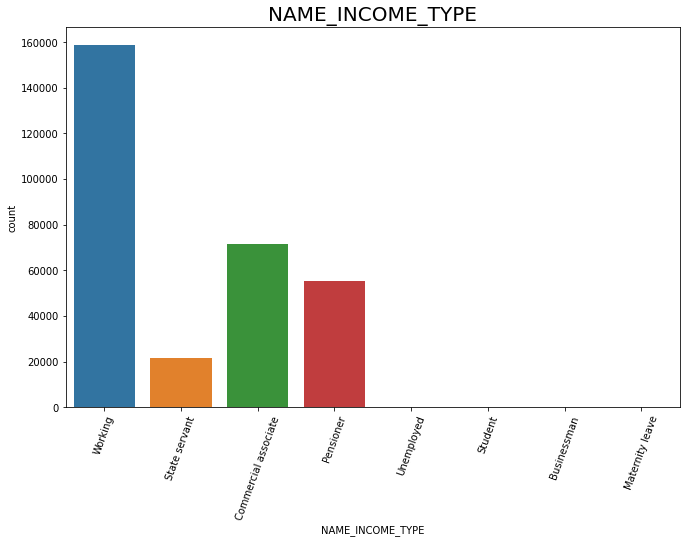

In [16]:
fig, ax = plt.subplots(figsize=(11,7))
sns.countplot(x='NAME_INCOME_TYPE',data=df)
plt.xlabel("NAME_INCOME_TYPE")
plt.xticks(rotation=70)
plt.title('NAME_INCOME_TYPE', fontsize=20)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

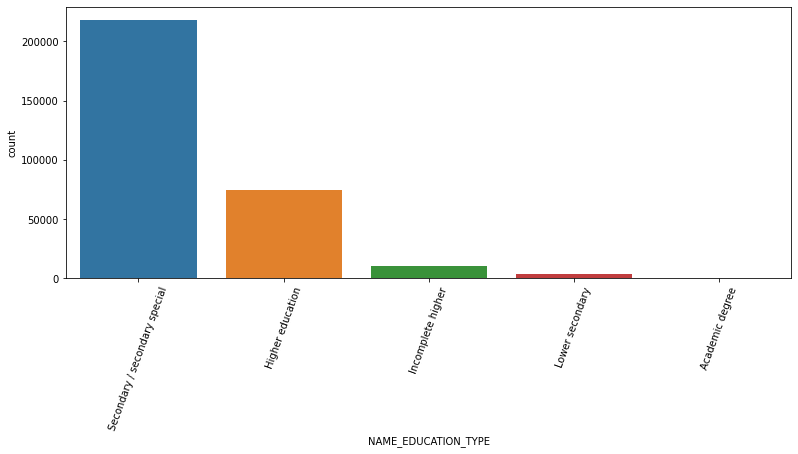

In [17]:
fig, ax = plt.subplots(figsize=(13,5))
sns.countplot(x='NAME_EDUCATION_TYPE',data=df)
plt.xlabel("NAME_EDUCATION_TYPE")
plt.xticks(rotation=70)

Text(0.5, 1.0, 'NAME_FAMILY_STATUS')

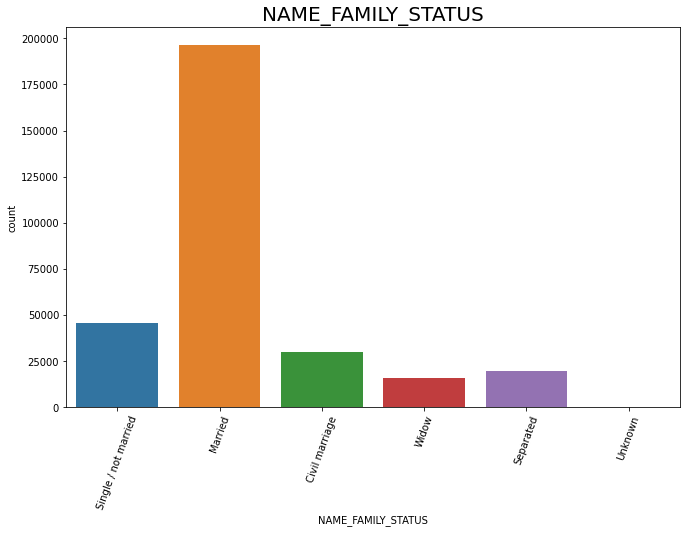

In [18]:
fig, ax = plt.subplots(figsize=(11,7))
sns.countplot(x='NAME_FAMILY_STATUS',data=df)
plt.xlabel("NAME_FAMILY_STATUS")
plt.xticks(rotation=70)
plt.title('NAME_FAMILY_STATUS', fontsize=20)

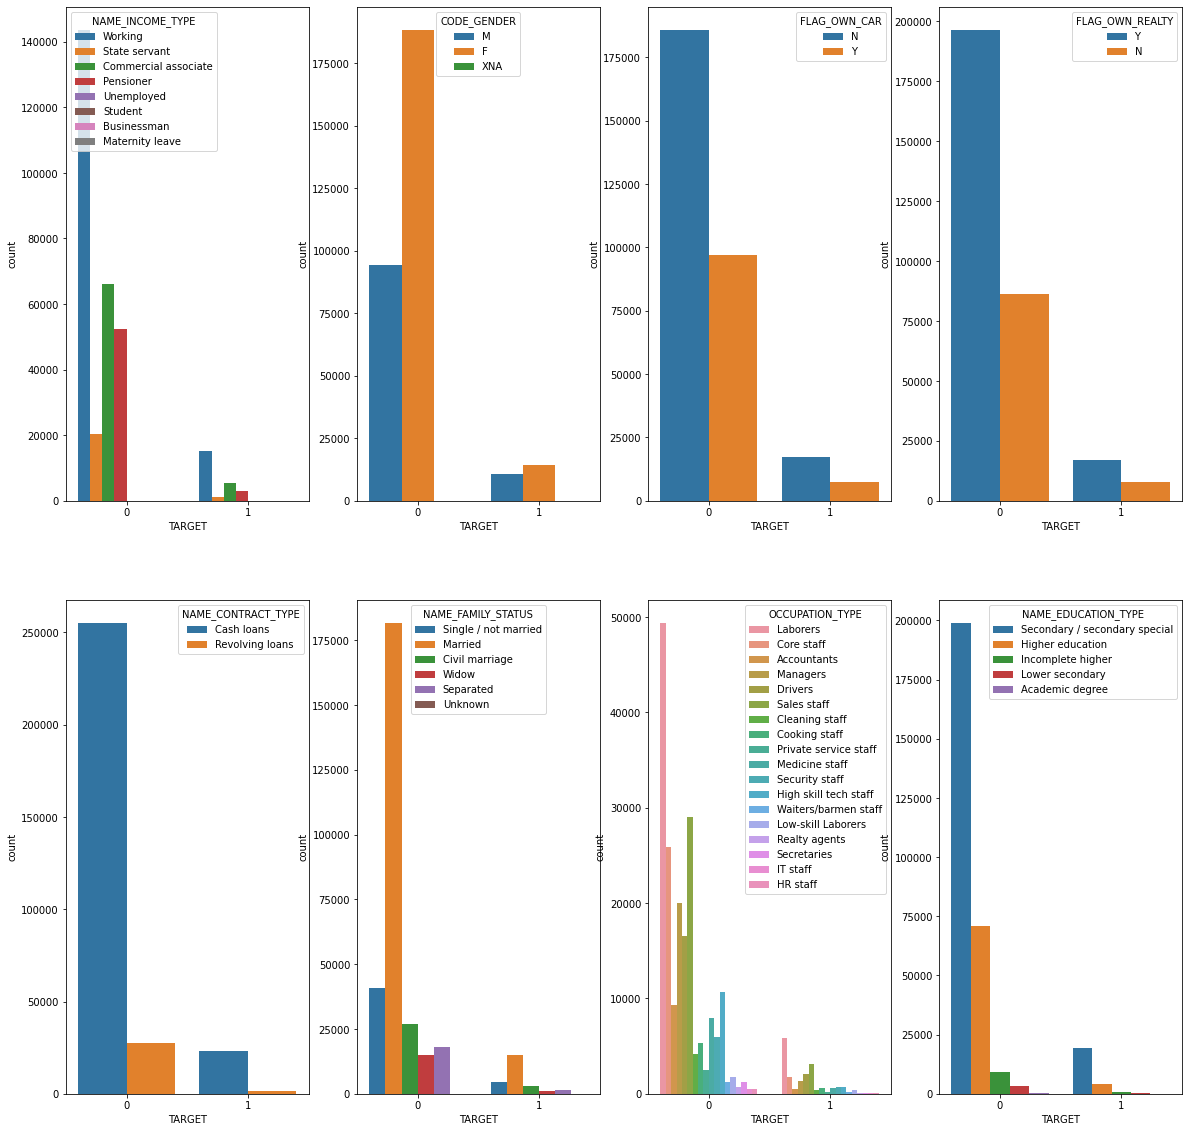

In [19]:
fig, saxis = plt.subplots(2, 4,figsize=(20,20))

sns.countplot(x='TARGET',hue='NAME_INCOME_TYPE',data=df, ax = saxis [0,0])
sns.countplot(x='TARGET',hue='CODE_GENDER',data=df, ax = saxis [0,1])
sns.countplot(x='TARGET',hue='FLAG_OWN_CAR',data=df, ax = saxis [0,2])
sns.countplot(x='TARGET',hue='FLAG_OWN_REALTY',data=df, ax = saxis [0,3])

sns.countplot(x='TARGET',hue='NAME_CONTRACT_TYPE',data=df, ax = saxis [1,0])
sns.countplot(x='TARGET',hue='NAME_FAMILY_STATUS',data=df, ax = saxis [1,1])
sns.countplot(x='TARGET',hue='OCCUPATION_TYPE',data=df, ax = saxis [1,2])
sns.countplot(x='TARGET',hue='NAME_EDUCATION_TYPE',data=df, ax = saxis [1,3])

In [20]:
columns_to_keep = missing_data[missing_data['Percent'] < 10]
columns_to_keep.index.tolist()

['NAME_TYPE_SUITE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE',
 'CNT_CHILDREN',
 'FLAG_DOCUMENT_8',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_OWN_REALTY',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_12',
 'AMT_CREDIT',
 'AMT_INCOME_TOTAL',
 'FLAG_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'TARGET',
 'REG_CITY_NOT_LIVE_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_LIVE_REGION',
 'HOUR_APPR_PROCESS_S

In [21]:
df = df[columns_to_keep.index.tolist()]

In [22]:
df.shape

(307511, 65)

In [23]:
df.isnull().sum()

NAME_TYPE_SUITE             1292
OBS_30_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
OBS_60_CNT_SOCIAL_CIRCLE    1021
DEF_60_CNT_SOCIAL_CIRCLE    1021
                            ... 
NAME_HOUSING_TYPE              0
NAME_FAMILY_STATUS             0
NAME_EDUCATION_TYPE            0
NAME_INCOME_TYPE               0
SK_ID_CURR                     0
Length: 65, dtype: int64

In [24]:
df = df.dropna()
df.shape

(304531, 65)

In [25]:
df = df.set_index('SK_ID_CURR')

In [26]:
# Change all negative values
df['DAYS_LAST_PHONE_CHANGE'] = abs(df['DAYS_LAST_PHONE_CHANGE'])
df['DAYS_ID_PUBLISH'] = abs(df['DAYS_ID_PUBLISH'])
df['DAYS_REGISTRATION'] = abs(df['DAYS_REGISTRATION'])
df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'])

# Change the days from birth to age
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH']) // 365
df.head()

,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,...,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,1134.0,...,1,2120,3648.0,637,25,0.018801,House / apartment,Single / not married,Secondary / secondary special,Working
100003,Family,1.0,0.0,1.0,0.0,0.622246,1129500.0,35698.5,2.0,828.0,...,1,291,1186.0,1188,45,0.003541,House / apartment,Married,Higher education,State servant
100004,Unaccompanied,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,815.0,...,1,2531,4260.0,225,52,0.010032,House / apartment,Single / not married,Secondary / secondary special,Working
100006,Unaccompanied,2.0,0.0,2.0,0.0,0.650442,297000.0,29686.5,2.0,617.0,...,1,2437,9833.0,3039,52,0.008019,House / apartment,Civil marriage,Secondary / secondary special,Working
100007,Unaccompanied,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,1106.0,...,1,3458,4311.0,3038,54,0.028663,House / apartment,Single / not married,Secondary / secondary special,Working


In [27]:
df = df.replace(365243, np.nan)
df = df.replace('XNA', np.nan)

In [28]:
df.DAYS_EMPLOYED.isnull().sum()

54852

In [29]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].interpolate()

In [30]:
df.DAYS_EMPLOYED.isnull().sum()

0

Working with Categorical Variables

In [31]:
# Replace categorical values to binary
df = df.replace({'FLAG_OWN_CAR' : { 'N' : 0, 'Y' : 1 }, 'CODE_GENDER' : { 'M' : 0, 'F' : 1 }, 'FLAG_OWN_REALTY' : { 'N' : 0, 'Y' : 1 }})

In [32]:
df.FLAG_OWN_CAR.unique()

array([0, 1])

In [33]:
df.NAME_EDUCATION_TYPE.unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [34]:
df.WEEKDAY_APPR_PROCESS_START.unique()

array(['WEDNESDAY', 'MONDAY', 'THURSDAY', 'SUNDAY', 'SATURDAY', 'FRIDAY',
       'TUESDAY'], dtype=object)

In [35]:
# Change categorical ordinal variables to numeric
df = df.replace({'NAME_EDUCATION_TYPE' : { 'Lower secondary' : 0, 'Secondary / secondary special' : 1, 'Incomplete higher': 2, 'Higher education': 3, 'Academic degree': 4 }, 'WEEKDAY_APPR_PROCESS_START' : { 'MONDAY' : 0, 'TUESDAY' : 1 , 'WEDNESDAY': 2, 'THURSDAY': 3, 'FRIDAY': 4, 'SATURDAY': 5, 'SUNDAY': 6}})

In [36]:
df = pd.get_dummies(data=df, columns=['NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE', 'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE', \
                             'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE'])

Standardization

In [37]:
df_to_scale = df[['AMT_GOODS_PRICE','AMT_ANNUITY', 'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT','AMT_INCOME_TOTAL', 'DAYS_ID_PUBLISH','DAYS_REGISTRATION', 'DAYS_EMPLOYED','DAYS_BIRTH', 'HOUR_APPR_PROCESS_START']]

In [38]:
ct = ColumnTransformer([

        ('somename', StandardScaler(), df_to_scale.columns.tolist())

    ], remainder='passthrough')

scaled_data = pd.DataFrame(ct.fit_transform(df_to_scale), columns=df_to_scale.columns.tolist())
scaled_data.head()

,AMT_GOODS_PRICE,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,HOUR_APPR_PROCESS_START
0,-0.508045,-0.168913,0.203968,-0.479832,0.142236,-0.579534,-0.380137,-0.782609,-1.543675,-0.630789
1,1.601415,0.590613,-0.166070,1.725606,0.425980,-1.791297,-1.079252,-0.536252,0.130091,-0.324592
2,-1.093329,-1.408581,-0.181790,-1.155204,-0.425252,-0.307235,-0.206352,-0.966818,0.715909,-0.936985
3,-0.654366,0.175422,-0.421227,-0.713367,-0.141508,-0.369513,1.376170,0.291348,0.715909,1.512585
4,-0.069082,-0.364699,0.170109,-0.215244,-0.198257,0.306928,-0.191870,0.290901,0.883285,-0.324592


In [39]:
scaled_data.index = df.index.copy()
df = df.drop(columns=df_to_scale.columns.tolist())
print(scaled_data.shape)
print(df.shape)

(304531, 10)
(304531, 133)


In [40]:
df1 = pd.concat([df, scaled_data], axis=1)
df1.head()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,CNT_FAM_MEMBERS,CNT_CHILDREN,FLAG_DOCUMENT_8,CODE_GENDER,FLAG_OWN_CAR,...,AMT_GOODS_PRICE,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,HOUR_APPR_PROCESS_START
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,2.0,2.0,2.0,2.0,0.262949,1.0,0,0,0.0,0,...,-0.508045,-0.168913,0.203968,-0.479832,0.142236,-0.579534,-0.380137,-0.782609,-1.543675,-0.630789
100003,1.0,0.0,1.0,0.0,0.622246,2.0,0,0,1.0,0,...,1.601415,0.590613,-0.166070,1.725606,0.425980,-1.791297,-1.079252,-0.536252,0.130091,-0.324592
100004,0.0,0.0,0.0,0.0,0.555912,1.0,0,0,0.0,1,...,-1.093329,-1.408581,-0.181790,-1.155204,-0.425252,-0.307235,-0.206352,-0.966818,0.715909,-0.936985
100006,2.0,0.0,2.0,0.0,0.650442,2.0,0,0,1.0,0,...,-0.654366,0.175422,-0.421227,-0.713367,-0.141508,-0.369513,1.376170,0.291348,0.715909,1.512585
100007,0.0,0.0,0.0,0.0,0.322738,1.0,0,1,0.0,0,...,-0.069082,-0.364699,0.170109,-0.215244,-0.198257,0.306928,-0.191870,0.290901,0.883285,-0.324592


In [41]:
df1.shape

(304531, 143)

In [42]:
df1.isnull().sum()

OBS_30_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
DEF_60_CNT_SOCIAL_CIRCLE    0
EXT_SOURCE_2                0
                           ..
DAYS_ID_PUBLISH             0
DAYS_REGISTRATION           0
DAYS_EMPLOYED               0
DAYS_BIRTH                  0
HOUR_APPR_PROCESS_START     0
Length: 143, dtype: int64

In [43]:
df1 = df1.dropna()

Train / Test Split

In [44]:
X = df1.loc[:, df1.columns != 'TARGET']
Y = df1.loc[:, df1.columns == 'TARGET']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, train_size = 0.7)

Building Machine Learning Models



1. Logistic Regression

In [45]:
lr = LogisticRegression()

lr.fit(X_train, Y_train)

Y_pred_class = lr.predict(X_test)

print(classification_report(Y_test, Y_pred_class))

print(roc_auc_score(Y_test, Y_pred_class))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84000
           1       0.36      0.00      0.00      7359

    accuracy                           0.92     91359
   macro avg       0.64      0.50      0.48     91359
weighted avg       0.87      0.92      0.88     91359

0.5004602187797255


2. Decision Tree

In [46]:
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, Y_train)

Y_pred_class = dt.predict(X_test)

print(classification_report(Y_test, Y_pred_class))

print(roc_auc_score(Y_test, Y_pred_class))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     84000
           1       0.13      0.15      0.14      7359

    accuracy                           0.85     91359
   macro avg       0.53      0.53      0.53     91359
weighted avg       0.86      0.85      0.86     91359

0.5301606002368333


3. Random Forest

In [47]:
rf = RandomForestClassifier(max_depth=5, random_state=42)

rf.fit(X_train, Y_train)

Y_pred_class = rf.predict(X_test)

print(classification_report(Y_test, Y_pred_class))

print(roc_auc_score(Y_test, Y_pred_class))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84000
           1       0.00      0.00      0.00      7359

    accuracy                           0.92     91359
   macro avg       0.46      0.50      0.48     91359
weighted avg       0.85      0.92      0.88     91359

0.5


4. XGBoost

In [48]:
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)

gbm.fit(X_train, Y_train)

Y_pred_class = gbm.predict(X_test)

print(classification_report(Y_test, Y_pred_class))

print(roc_auc_score(Y_test, Y_pred_class))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84000
           1       0.56      0.00      0.01      7359

    accuracy                           0.92     91359
   macro avg       0.74      0.50      0.48     91359
weighted avg       0.89      0.92      0.88     91359

0.5012636421874089


In [49]:
submission = pd.DataFrame(Y_pred_class, columns=['TARGET'], index = X_test.index)

submission.to_csv('submission.csv')

In [50]:
submission

,TARGET
SK_ID_CURR,
367501,0
244023,0
187119,0
242190,0
330325,0
...,...
361929,0
178181,0
401783,0
